<a href="https://colab.research.google.com/github/WagnerJales/fadiga_e_distracao_motoristas/blob/main/Ocorr%C3%AAncias_de_Fadiga_e_Distra%C3%A7%C3%A3o_An%C3%A1lise_descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Ocorrências de fadiga e distração ao volante: Uma análise descritiva dos dados usando Python**

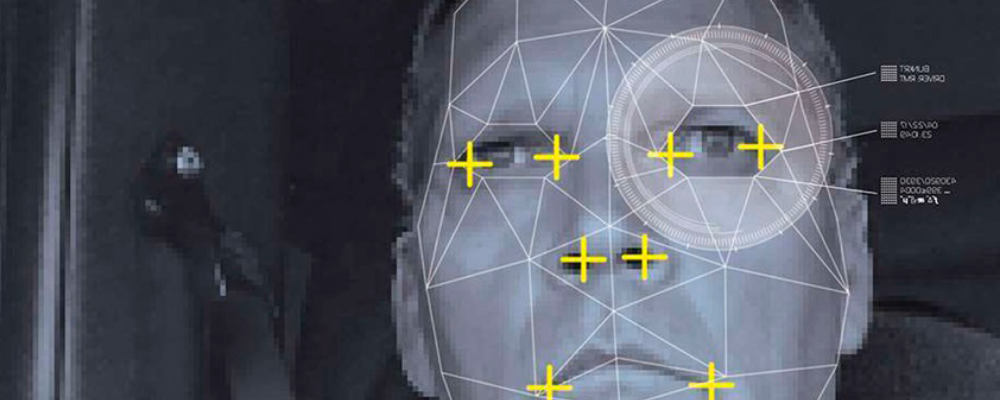

É possível prever quando um motorista manifestará sintomas de fadiga ao dirigir? A fadiga tem causas diversas e seus sintomas se manifestam por um bocejo ou até mesmo passando curtos espaços de tempo de olhos fechados ao volante?
Uma das tecnologias desenvolvidas para identificar tais sintomas é através do reconhecimento deles na expressão facial dos motoristas.
A partir dos dados históricos de uma operação de transporte de passageiros sob regime de fretamento, realizou-se uma análise exploratória dos dados e das relações entre as ocorrências (Variável explicada) e dados de tempo e espaço referente a tais ocorrências buscando identificar algum insght que possibilite modificar a operação para reduzir a exposição dos motoristas e, por consequencia, dos passeiros transportados.

##Carregando bibliotecas

In [2]:
# Análise e manipulação
import pandas as pd
import numpy as np

# Visualização
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##Analisando os dados

In [3]:
#Visualizando a estrutura do dataset
df = pd.read_csv("eventos.csv")
df.head()


,idveiculo,dia,mes,diadasemana,hora,Velocidade,Longitude,Latitude,Eventos
0,33,2,3,3,0.097778,32,-49.141701,-5.38801,3
1,34,24,3,4,0.397986,32,-49.131100,-5.37021,3
2,34,16,3,3,0.672743,25,-49.130100,-5.38569,3
3,1,18,4,1,0.753519,27,-49.126598,-5.37226,3
4,1,18,4,1,0.753553,16,-49.126400,-5.37213,3


In [4]:
df


,idveiculo,dia,mes,diadasemana,hora,Velocidade,Longitude,Latitude,Eventos
0,33,2,3,3,0.097778,32,-49.141701,-5.38801,3
1,34,24,3,4,0.397986,32,-49.131100,-5.37021,3
2,34,16,3,3,0.672743,25,-49.130100,-5.38569,3
3,1,18,4,1,0.753519,27,-49.126598,-5.37226,3
4,1,18,4,1,0.753553,16,-49.126400,-5.37213,3
...,...,...,...,...,...,...,...,...,...
23796,84,5,5,4,0.722257,19,-44.055401,-2.56041,3
23797,226,27,5,5,0.383981,24,-44.055401,-2.56139,3
23798,84,5,5,4,0.210012,26,-44.055000,-2.56290,3
23799,86,10,5,2,0.260637,31,44.253502,2.54412,3


**OBSERVAÇÕES:**

 Os dados categorizados (Strings) já foram convertidos em dados numéricos. Os meses foram substituidos pelos seus valores correspondentes (janeiro = 1, fevereiro = 2, etc...); os dias da semana seguem a ordem: domingo = 1, segunda = 2, etc...

Os tipos de evento também foram convertidos em numeros conforme abaixo:

*   "Bocejo" = 1
*   "Oclusão" = 2
*   "Olhando para baixo 1" = 3
*   "Olhando para baixo 2" = 4
*   "Sonolência 1" = 5
*   "Sonolência 2" = 6

*Olhando para baixo* signifca desviar o olhar da frente, N1 por em até 1,5 segundo e N2, 2,5 segundos.
*Sonolência* significa fechar o olho, 1 para 1,5 segundo e 2 para 2,5 segundos.
A ocorrência de *Sonolência 2* é o caso mais grave pois, passar 2,5 segundos, mesmo em baixa velocidade como 40km/h por exemplo, representa uma distância considerável que grande possibilidade de ocorrência de um acidente catratrófico.


In [5]:
#Identificando o tipo de variável
df.dtypes

idveiculo        int64
dia              int64
mes              int64
diadasemana      int64
hora           float64
Velocidade       int64
Longitude      float64
Latitude       float64
Eventos          int64
dtype: object

**Estatística descritiva do dataset**

In [6]:
df.describe()

,idveiculo,dia,mes,diadasemana,hora,Velocidade,Longitude,Latitude,Eventos
count,23801.000000,23801.000000,23801.000000,23801.00000,23801.000000,23801.000000,23801.000000,23801.000000,23801.000000
mean,102.073274,17.723205,4.658796,3.86135,0.497806,35.086635,-44.291831,-2.572519,2.994580
std,71.228369,9.336651,0.643196,1.85792,0.240141,11.742313,0.846938,0.146979,0.274268
min,1.000000,1.000000,3.000000,1.00000,0.000116,15.000000,-49.141701,-5.428300,1.000000
25%,46.000000,10.000000,4.000000,2.00000,0.287847,26.000000,-44.334400,-2.582080,3.000000
50%,78.000000,20.000000,5.000000,4.00000,0.423449,34.000000,-44.323898,-2.568040,3.000000
75%,170.000000,26.000000,5.000000,5.00000,0.730891,44.000000,-44.228802,-2.554150,3.000000
max,229.000000,31.000000,6.000000,7.00000,0.999907,79.000000,44.329201,2.571570,6.000000


**Distribuição de Frequência das Variáveis**

As variáveis "idveiculo", "dia", "diadasemana", "mes" e "Eventos" são discretas e as variáveis "hora", "velocidade", "Latitude" e "Longitude" são contínuas e todas com comportamentos distintos.

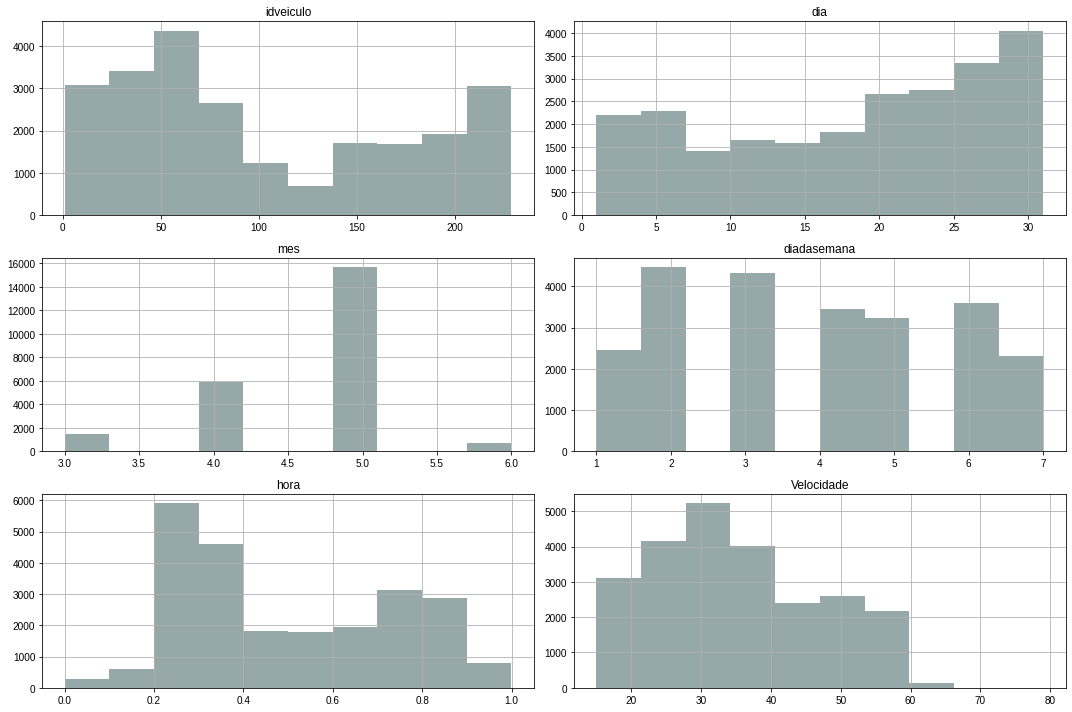

In [7]:
df.hist(['idveiculo', 'dia', 'mes', 'diadasemana', 'hora', 'Velocidade'], figsize=(15,10), color='#96a8a8')

# Estilo dos gráficos
plt.style.use('seaborn')

# Ajustar o layout
plt.subplots_adjust( hspace=0.35, wspace=0.15 )

plt.tight_layout()

**Analisando a correlação entre as variáveis**

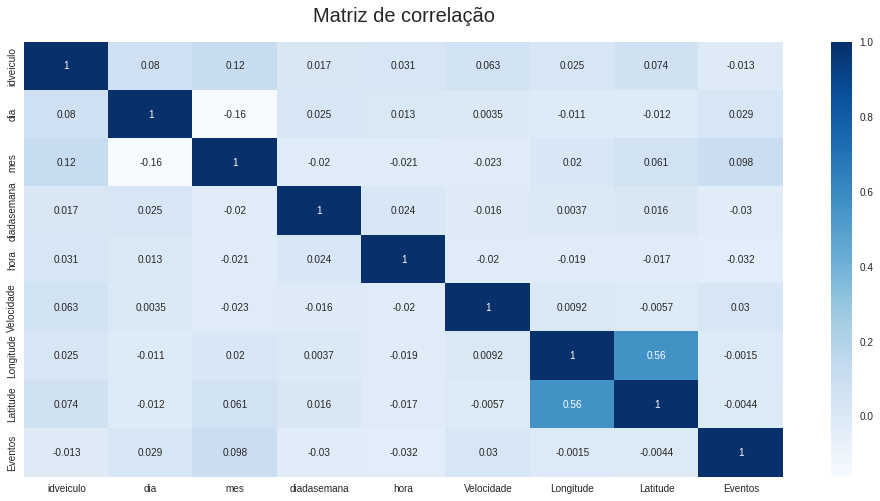

In [8]:
# Mapa de calor de correlação
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(), annot = True, cmap='Blues')
plt.title('Matriz de correlação', fontsize = 20, pad = 20)
plt.show()

Observando as correlações entre os "eventos" e as demais variáveis, todas correlação muito baixa, numa escala de "zero" a "1", os valores não passam de 10%.

##Analisando a Variável "Eventos"


In [9]:
#Contangem de Eventos por Tipo
df['Eventos'].value_counts().to_frame()

,Eventos
3,23326
1,251
5,185
2,19
4,19
6,1


Nota-se quantidade do evento "3" é extremamente superior aos demais e esse fato exigiu um aprofundamento do entendimento do dado. 



Analisando a origem do dado, da forma como é captada pelo sistema de detecção de fadiga e sonolência até o critério lógico do sistema para considera-lo uma ocorrência válida, identificou-se com o sendo considerando uma falha no sistema de detecção - equipamento muito "sensível" à captação do "olhar para baixo" em até 1,5 segundos. Criou-se um novo dataset sem esses dados. 

In [10]:
df.head()

,idveiculo,dia,mes,diadasemana,hora,Velocidade,Longitude,Latitude,Eventos
0,33,2,3,3,0.097778,32,-49.141701,-5.38801,3
1,34,24,3,4,0.397986,32,-49.131100,-5.37021,3
2,34,16,3,3,0.672743,25,-49.130100,-5.38569,3
3,1,18,4,1,0.753519,27,-49.126598,-5.37226,3
4,1,18,4,1,0.753553,16,-49.126400,-5.37213,3


In [11]:
#filtrando o Evento 3 para construção do novo Dataframe
filtro  = df['Eventos'] != 3
df2 = df[filtro]
df2.head()
df2.value_counts().to_frame()
df2.shape

(475, 9)

In [12]:
df2.head()


,idveiculo,dia,mes,diadasemana,hora,Velocidade,Longitude,Latitude,Eventos
59,37,10,3,4,0.836736,21,-44.379200,-2.56318,1
61,37,8,3,2,0.399965,18,-44.378601,-2.56403,1
67,11,20,4,3,0.930914,18,-44.377800,-2.56415,1
72,150,13,4,3,0.677465,15,-44.377701,-2.55297,2
79,37,10,3,4,0.879120,23,-44.377399,-2.56419,1


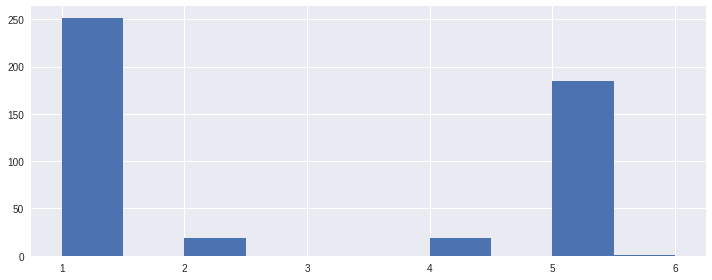

In [13]:
# Plotando o gráfico com a quantidade de ocorrências por tipo de "Evento" após a correção da base
plt.figure(figsize=(10,4));
df2['Eventos'].hist()
plt.tight_layout()

##Analisando a variável "Evento" em conjunto com as demais variáveis

Para analisar a relação dos eventos com as demais variávis, verificou-se então a distribuição dos eventos ao longo do tempo:

1.   Ao longo do dia;
2.   Ao longo da semana e; 
2.   Ao longo dos meses

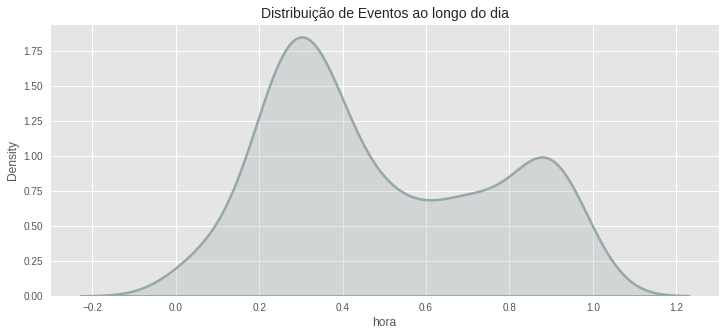

In [14]:
# Ao longo do dia

# Tamanho
plt.figure( figsize=(12, 5) )

# Estilo
plt.style.use('ggplot')

# titulo
plt.title('Distribuição de Eventos ao longo do dia', loc='center', fontsize=14 )

# Plot
sns.kdeplot(df2['hora'], color='#96a8a8', shade=True,linewidth=2.5 );

O gráfico sugere 2 "picos" de ocorrências de eventos, um que corresponderia ao horario de entrada dos empregados e o outro na saída do turno da noite. Obviamente os picos coincidem com os momentos de marior movimentação dos empregados pois nos horários intermediários, a maioria dos veiculos estão na garagem e alguns poucos fazem viagens de distribuição interna na empresa.

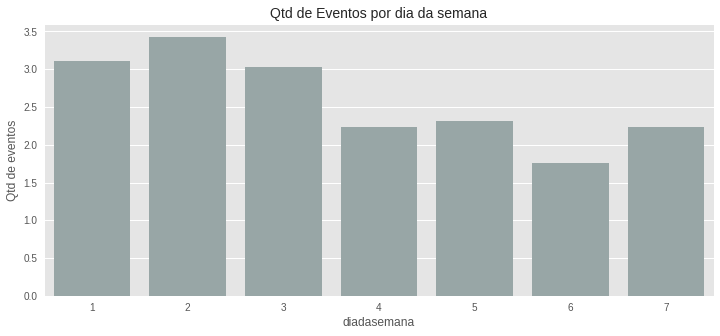

In [15]:
# Ao longo da semana

# Tamanho da imagem
plt.figure( figsize=(12, 5) )

# Titulo
plt.title('Qtd de Eventos por dia da semana', loc='center', fontsize=14 )

# Grafico
sns.barplot( data=df2, x='diadasemana', y='Eventos', ci=None, color='#96a8a8')

# Label
plt.ylabel('Qtd de eventos');

Os dados sugerem um volume superior de ocorrências às segundas-feiras. O fato da realidade que pode explicar essa tendência é a possibilidade dos motoristas que rodam às segundas não cumprirem o repouso necessário no final de semana para começar a semana com a disposição necessária para o exercicio da função.

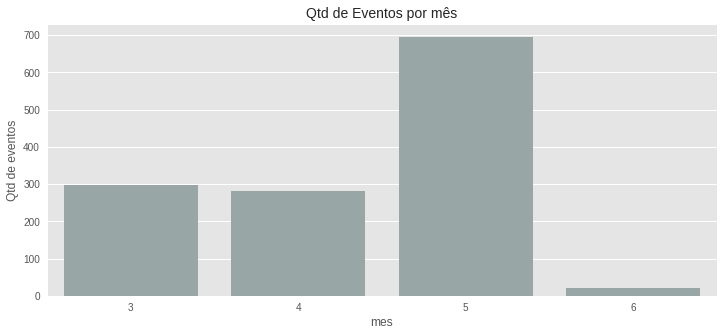

In [16]:
# Ao longo dos meses

# Tamanho da imagem
plt.figure( figsize=(12, 5) )

# Titulo
plt.title('Qtd de Eventos por mês', loc='center', fontsize=14 )

# Grafico
sns.barplot( data=df2, x='mes', y='Eventos', ci=None, color='#96a8a8', estimator=sum)

# Label
plt.ylabel('Qtd de eventos');

**Ocorrências por velocidade**

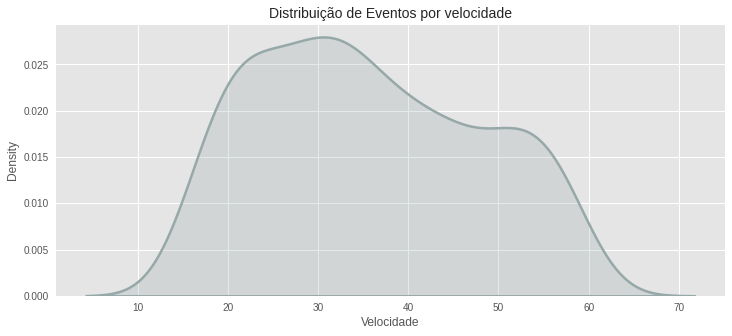

In [17]:
# Ao longo do dia

# Tamanho
plt.figure( figsize=(12, 5) )

# Estilo
plt.style.use('ggplot')

# titulo
plt.title('Distribuição de Eventos por velocidade', loc='center', fontsize=14 )

# Plot
sns.kdeplot(df2['Velocidade'], color='#96a8a8', shade=True, linewidth=2.5);


Quando observa-se a velocidade, 2 picos; um de baixa velocidade (30km/h) e o segundo proximo aos 60km/h. O pico de baixa velocidade pode ocorrer nos dados pois grande parte dos deslocamentos ocorrem dentro da área da empresa onde a velocidade é controlada, e o pico de 60km/h, no trânsito da própria cidade.

##Combinando variáveis explicativas para analisar os eventos

**Considerando a localização das ocorrências e a velocidade**

O mapa mostra que as ocorrências de baixa velocidade ocorrem na área industrial, em oposição às ocorrências na avenida dos Holandeses que concentram muitas ocorrências de "Sololência N1" nas velocidades maiores. Outra concentração de eventos nas velocidades maiores está na avenida dos Portugueses, via de acesso à area industrial e trecho da via que se sobrepõem diversas rotas. Ao longo da BR-135 aonde a velocidade é natualmente maior.
As vias principais tendem a concentrar as ocorrências de alta velocidade de de maior risco ("Solonência N1), e as vias locais tendem a concentrar velocidades mais baixas e ocorrências de menor periculosidade, no caso, "bocejo".




In [18]:
figgeo = px.scatter_mapbox(df2, lat="Latitude", lon="Longitude", color="Velocidade", size="Eventos", width = 1500, height = 900, 
                       size_max=20, zoom=10,
                  mapbox_style="carto-positron")
figgeo.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
figgeo.show()
# uma escala de cor espcial pode ser adicionada utilizando - color_continuous_scale=px.colors.cyclical.IceFire, 

**Observando os tipos de ocorrências pela velocidade ao longo do dia**

Considerando o eixo "x" como as horas ao longo dia "normalizada" (ou seja, variando de 0 a 1) observa-se o pico da manhã e o pico da tarde. 
Entre os tipos de ocorrência, apenas o "bocejo" possui eventos no pico da tarde sendo este superior ao primeiro, sua maior frequência são em baixas velocidades com tendência de redução a medida que se aumenta esta variável.
"Sonolência N1" contrabalanceia as ocorrências de "bocejo" concentrando as suas no pico da manhã quase não existindo no pico da tarde mas em contra-partida, em termos de velocidade, concetra 2 "picos"; em 32km/h e em 52km/h.
A "oclusão" possui eventos no "entre picos", não obedecendo ao padrão dos demais.
"olhando para baixo N2" tem características similares a "Sonolência N1" em relação a distribuição de eventos ao longo do dia, e em relação a velocidade, concentra suas ocorrências em baixas velocidades e vai decaindo a medida que a velocidade aumenta.
O caso de "Sonolência N2", unico registro do período, ocorre no pico da manhã e com velocidade acima da média.


In [20]:
#Convertendo os dados da coluna "Eventos" de um tipo "inteiro" para "string"
df2.Eventos = df2.Eventos.astype(str)

df2['Eventos'] = df2['Eventos'].map({
    '1' : 'Bocejo', 
    '2' : 'Oclusão', 
    '4' : 'Olhando pra Baixo N2', 
    '5' : 'Sonolência N1', 
    '6' : 'Solonência N2'})

#rodando o gráfico de dispersão com histogramas 
px.scatter(df2, x="hora", y="Velocidade", color = "Eventos", size = "Velocidade", marginal_x="histogram", marginal_y="histogram", width = 1500, height = 700)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Conclusões e considerações

**Em relação a forma de captação da informação de fadiga**

O corpo manifesta de diversas a condição da fadiga/distraçãoo mas, apesar da experiência humana ser algo complexo, a tecnologia se esforça na busca de captar manifestações faciais que possam ser correlacionadas com a incapacidade do motorista de exercer a sua função, não capta necessariamente o que acontece "por dentro" pois nem toda expressão facial considerada na tecnologia é expressão da incapacidade do motorista em excercer a sua atividade. Mas esse fato não invalida o uso da tecnologia.

O sistema de detecção de fadiga/distração pode ser considerado a "última barreira" para prevenção de acidentes mas uma barreira eficaz é aquela que sequer permitirá que o motorista incapaz inicie a jornada de trabalho.



**Sobre o dado 'Olhar para baixo N1'**

Este evento é captado quando o motorista desvia o olhar da frente em 1,5seg e esse tipo de comportamento não caracteriza necessariamente o comportamento de fadiga/distração pois esse desvio é necessário para que o motorista olha o retrovisor em cruzamentos, conversões e paradas em semáforos. 



**Sobre a 'Oclusão'**

A Oclusão também não é necessiariamente o comportamento de fadiga/distração pois é uma ação voluntária do motorista em inibir o funcionamento da câmera sugerindo ações adiministrativas com a identificação dos motoristas. A oclusão também pode ser falha no equipamento.


**Em relação aos dias da semana**

A chamada "lei do motorista" (13.103/2015) prevê tempo descanço no interjornada para os motoristas mas é necessário expandir o conceito pois qualquer esforço prolongado que o motorista execute no final-de-semana que não seja necessariamente digirir, está sujeito a ter o mesmo efeito no que diz repeito a coloca-lo numa condição de fadiga. 

É necessário observar se de fato os motoristas do regime administrativo (que operam de segunda a sexta) estão cumprindo o repouso necessário no final de semana para que não começem a jornada na segunda-feita já fadigados. Para isso pode-se associar testes de atenção antes do inicio da jornada, especialmente para estes casos.


**Em relação ao local das ocorrências**

A concentração das ocorrências em "baixa velocidade" na área industrial sugere que de fato os motoristas obedecem as retrições de velocidade impostas devido ao próprio risco operacional do lugar. O fato de haver uma quantidade significativa de ocorrência nessa região citada não significa necessamente que os motoristas são mais fadigados ou distraídos em tais locais, o que de fato ocorre é que se tem mais quilômetro rodado por m² nessa região do que no restante da cidade, então a possibilidade de ocorrência dos eventos dentro da área industrial é significativamente superior. Para testes futuros, pode-se agregar à analise um indicador de "densidade de circulação" para que fututos modelos preditivos captem tal condição.

Em relação as ocorrências no Araçagy, precisaria observa o inicio da jornada de trabalho dos motoristas pois, operacionalmente, o mesmo precisa ir até a gararem pegar o veiculos para depois se dirigir até o ponto inicial da rota. Se considerar as rotas mais longas e de ponto inicial distante da garagem como no caso destas, o motorista precisa acordar até 3h antes que o primeiro empregado chegue na área industrial.

**Recomendações para trabalhos futuros**

Recomenda-se a realização de testes estatísticos que permitam verificar a hipotese de haver uma relação "hierarquia" entre os tipos de ocorrências como uma espécie de "pirâmide de Bird" da qual possa se prever um caso mais grave (no caso, sonolência N2) a partir do acumulo de ocorrências menos graves. Por exemplo, quantas ocorrências de "Sonolência N1" acontecem antes de uma "N2"?

Para isso é necessário que os dados sejam estruturados de forma a vincular as ocorrências ao motorista realizando numa mesma viagem. Esse tipo de estruturação de dados facilitará até na identificação da fadiga/distração como causas durante a investigação de acidentes.